#1. Light GBM
> Light GBM은 트리 기반의 학습 알고리즘인 gradient boosting 방식의 프레임 워크이다.

#2. 특징
> Light GBM은 나무를 수직으로 확장한다. 반면 다른 알고리즘은 나무를 수평으로 확장한다. 따라서 기존의 알고리즘은 수평으로 확장하여 포화 트리를 만드는 방향으로 학습하는 반면 leaf-wise tree growth인 LGBM은 최대 delta loss가 증가하도록 잎의 개수를 정한다. leaf-wise알고리즘은 다른 level-wise 알고리즘보다 낮은 loss를 달성하는 경향이 있다. 데이터의 크기가 작은 경우 leaf-wise는 과적합(overfitting)되기 쉬우므로 max_depth를 줄여줘야 한다.

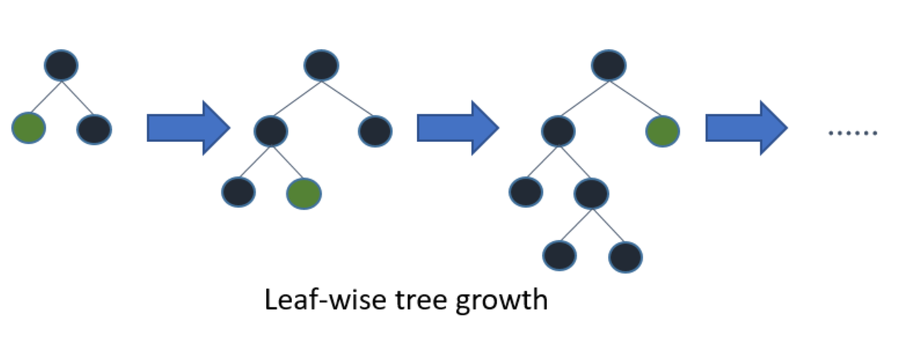

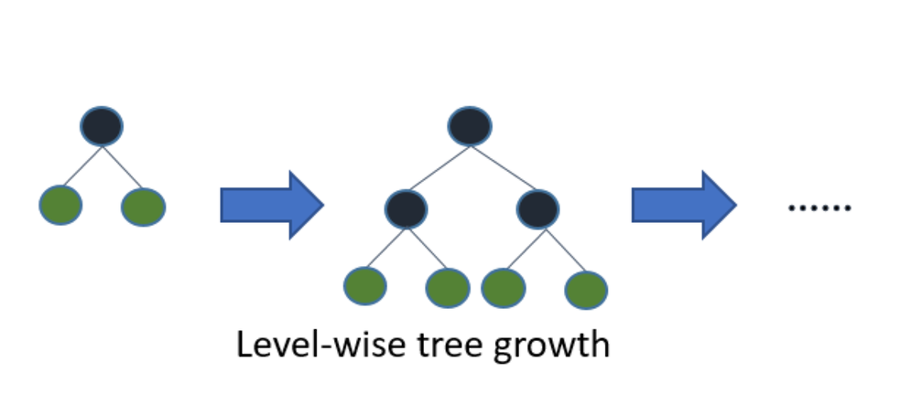

#3. LGBM은 왜 이렇게 유명해졌나
> 데이터의 크기가 커짐에 따라 빠른 결과를 내는 것도 중요해지고 있다. 그런점에서 Light GBM은 'Light'의 접두사와 같이 속도가 빠른 것이 장점이다. 메모리를 적게 차지하고 속도가 빠르다는 장점 외에도, LGBM은 결과의 정확도가 높다는 장점이 있다. 또한, GPU를 활용할 수 있기 때문에 널리 사용되고 있다.

> 하지만, 위에서 말했듯이 overfitting에 민감하여 데이터의 크기가 작을 경우 기존의 머신러닝 알고리즘이 더 좋을 수 있다. 데이터의 개수(행 수)가 10,000개 이상일 때 사용하는 것이 좋다.

#4. 주요 파라미터

1. learning_rate
> 일반적으로 0.01 ~ 0.1 정도로 맞추고 다른 파라미터를 튜닝한다. 나중에 성능을 더 높일 때 learning rate를 더 줄인다.

2. num_iterations
>기본값이 100인데 1000정도는 해주는게 좋다. 너무 크게하면 과적합이 발생할 수 있다.
같은 뜻으로 사용되는 옵션: num_iteration, n_iter, num_tree, num_trees, num_round, num_rounds, num_boost_round, n_estimators

3. max_depth
>-1로 설정하면 제한없이 분기한다. feature가 많다면 크게 설정한다. 파라미터 설정 시 우선적으로 설정한다.

4. boosting 
>부스팅 방법: 기본값은 gbdt이며 정확도가 중요할때는 딥러닝의 드랍아웃과 같은 dart를 사용한다. 샘플링을 이용하는 goss도 있다.
boosting 🔗︎, default = gbdt, options: gbdt, rf, dart, goss
gbdt : traditional Gradient Boosting Decision Tree, aliases: gbrt
rf : Random Forest, aliases: random_forest
dart : Dropouts meet Multiple Additive Regression Trees
goss : Gradient-based One-Side Sampling

5. bagging_fraction
> 배깅을 하기위해서 데이터를 랜덤 샘플링하여 학습에 사용한다. 비율은 0 < fraction <= 1 이며 0이 되지 않게 해야한다.

6. feature_fraction
>feature_fraction이 1보다 작다면 LGBM은 매 iteration(tree)마다 다른 feature를 랜덤하게 추출하여 학습하게된다. 만약, 0.8로 값을 설정하면 매 tree를 구성할 때, feature의 80%만 랜덤하게 선택한다. 과적합을 방지하기 위해 사용할 수 있으며 학습 속도가 향상된다.

7. scale_pos_weight
>클래스 불균형의 데이터 셋에서 weight를 주는 방식으로 positive를 증가시킨다. 기본값은 1이며 불균형의 정도에 따라 조절한다.

8. early_stopping_round
>Validation 셋에서 평가지표가 더 이상 향상되지 않으면 학습을 정지한다. 평가지표의 향상이 n round 이상 지속되면 학습을 정지한다.

9. lambda_l1, lambda_l2
>정규화를 통해 과적합을 방지할 수 있지만, 정확도를 저하시킬수도 있기 때문에 일반적으로 default 값인 0으로 둔다.

- 더 빠른 속도
  - bagging_fraction
  - max_bin은 작게
  - save_binary를 쓰면 데이터 로딩속도가 빨라짐
  - parallel learning 사용
- 더 높은 정확도
  - max_bin을 크게
  - num_iterations 는 크게하고 learning_rate는 작게
  - num_leaves를 크게(과적합의 원인이 될 수 있음)
  - boosting 알고리즘 'dart' 사용
- 과적합을 줄이기
  - max_bin을 작게
  - num_leaves를 작게
  - min_data_in_leaf와 min_sum_hessian_in_leaf 사용하기

https://nurilee.com/2020/04/03/lightgbm-definition-parameter-tuning/